In [172]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os
import matplotlib.transforms as mtransforms
from model_parameters import *

# Heaviside function 
def heav(X):
    if X <= 0:
        return 0
    elif X>0:    
        return 1    

In [173]:
def perturb_max_min(per,XX,__):
    
    f = pd.read_csv("../data/param_model.txt",sep="\t")
    index_ = f.param.tolist()

    if __ == 0:
        
        sampling_list = []
        for i in range(f.shape[0]):
            f2 = list(f.value)[i]
            if i == XX:
                lower_ = f2 - abs(f2)*per
                sampling_list.append(lower_)
            else:
                sampling_list.append(f2)
                
        dict_ = dict(zip(index_,sampling_list))

        globals().update(dict_)

            
            
    if __ == 1:
        
        sampling_list = []
        for i in range(f.shape[0]):
            f2 = list(f.value)[i]
            if i == XX:
                upper_ = f2 + abs(f2)*per
                sampling_list.append(upper_)
            else:
                sampling_list.append(f2)
        
        dict_ = dict(zip(index_,sampling_list))

        globals().update(dict_)

        
                
    if __ == 2:
        
        sampling_list = list(f.value)
        
        dict_ = dict(zip(index_,sampling_list))

        globals().update(dict_)



In [182]:
def run_(per,XX,__):
    
    
    perturb_max_min(per,XX,__)

    """
    Model parameters
    """
    r_glucose =0.0077
    cell_size=0.65
    f_mean_glucose = 0.55
    f_CV_glucose = 0.1
    S0_mean = 0.60
    S0_CV = 0.1    
    SPN_mean = 0.07
    SPN_CV = 0.03
    SPO_mean = 0.07
    SPO_CV = 0.03
    S0_log = np.random.lognormal(np.log(S0_mean),S0_CV,1)[0]


    """
    Initial state at G1 phase
    """
    
    cln3=0
    whi5=1
    sbf=0
    cln2=0
    mbf=0
    clb5=0
    ori=0
    mcm1=0
    clb2G=0
    clb2M=0
    cdc20=0
    cdc5=0
    cdc14=0
    swi5=0
    cdh1=1
    sic1=1
    nrm1=0
    sac = 0
    spoc= 0
    del_sac = 0
    spn_progress = 0
    spoc_progress = 0
    time = 0
    divide_status = ""
    sac_event = [] # to track sac checkpoint event
   
    init_state = [cln3,whi5,sbf,cln2,mbf,clb5,ori,clb2G,cdc5,mcm1,clb2M,sac,cdc20,spoc,cdc14,swi5,cdh1,sic1,nrm1,
                  time,cell_size,S0_log,divide_status,spn_progress,spoc_progress]
    
    sim_list = [init_state]
    tr_ = 500
    
    for j in range(tr_):
        
        
        """
        W function of Boolean variables
        """
            
        cln3_sum = (cell_size >= S0_log)
        whi5_sum = k60 + k61*cdc14 - k62*cln2 - k63*cln3 
        sbf_sum =  k45 + k47*clb5 + k48*cln2 + k49*cln3 - k46*clb2G - k50*whi5 
        cln2_sum = k30 + k31*mbf + k32*sbf 
        mbf_sum  = k33 + k35*clb5 + k36*cln2 + k37*cln3 - k34*clb2G - k38*nrm1 
        clb5_sum = k25 + k27*mbf + k28*sbf - k29*sic1 - k26*cdc20 
        clb2G_sum = k19 - k20*cdh1 - k21*sic1
        clb2M_sum =  k22 + k24*mcm1 - k23*cdc20
        mcm1_sum = k39 + k41*clb2M + k40*clb2G
        cdc5_sum = k9 + k11*clb2G + k12*clb2M - k10*cdh1 
        cdc20_sum =  k6 + k7*mcm1 - k8*sac 
        cdc14_sum = k1 + k2*cdc5 - k5*spoc - k4*sac - k3*clb2M
        swi5_sum =  k57 + k58*cdc14 + k59*mcm1 
        cdh1_sum = k13 + k14*cdc14 - k16*clb2M - k17*clb5 - k18*cln2 - k15*clb2G
        sic1_sum = k51 + k56*swi5 - k53*clb2M - k54*clb5 - k55*cln2 - k52*clb2G
        nrm1_sum = k42 - k43*cdh1 + k44*mbf



        """
        Binarizing the sum variables by Heaviside function
        """
        cln3_new = heav(cln3_sum)
        whi5_new = heav(whi5_sum)
        sbf_new = heav(sbf_sum)
        cln2_new = heav(cln2_sum)
        mbf_new = heav(mbf_sum)
        clb5_new = heav(clb5_sum)
        mcm1_new = heav(mcm1_sum)
        clb2M_new = heav(clb2M_sum)
        cdc20_new = heav(cdc20_sum) 
        cdc5_new = heav(cdc5_sum)
        cdc14_new = heav(cdc14_sum) 
        swi5_new = heav(swi5_sum)
        cdh1_new = heav(cdh1_sum)
        sic1_new = heav(sic1_sum)
        clb2G_new = heav(clb2G_sum)
        nrm1_new = heav(nrm1_sum)


        """
        Which variables change?
        """

        cln3_update = cln3_new - cln3
        whi5_update = whi5_new - whi5
        sbf_update =  sbf_new - sbf
        cln2_update = cln2_new - cln2
        mbf_update  = mbf_new - mbf
        clb5_update = clb5_new - clb5
        mcm1_update = mcm1_new - mcm1
        clb2M_update = clb2M_new - clb2M
        cdc20_update = cdc20_new - cdc20
        cdc5_update = cdc5_new - cdc5
        cdc14_update = cdc14_new - cdc14
        swi5_update = swi5_new - swi5
        cdh1_update = cdh1_new - cdh1
        sic1_update = sic1_new - sic1
        clb2G_update = clb2G_new - clb2G
        nrm1_update = nrm1_new - nrm1


        """
        Selecting a single variable to change with a uniform asynchronous update
        """

        x1 = abs(cln3_update)
        x2 = x1 + abs(whi5_update)
        x3 = x2 + abs(sbf_update)
        x4 = x3 + abs(cln2_update)
        x5 = x4 + abs(mbf_update)
        x6 = x5 + abs(clb5_update)
        x7 = x6 + abs(mcm1_update)
        x8 = x7 + abs(clb2M_update)
        x9 = x8 + abs(cdc20_update)
        x10 = x9 + abs(cdc5_update)
        x11 = x10 + abs(cdc14_update)
        x12 = x11 + abs(swi5_update)
        x13 = x12 + abs(cdh1_update)
        x14 = x13 + abs(sic1_update)
        x15 = x14 + abs(clb2G_update)
        x16 = x15 + abs(nrm1_update)

        if x16 == 0:
            x17 = 1
        else:
            x17 = x16


        sel = random.uniform(0,1)*x17

        y1 = (sel<=x1)
        y2 = (sel>x1)&(sel<=x2)
        y3 = (sel>x2)&(sel<=x3)
        y4 = (sel>x3)&(sel<=x4)
        y5 = (sel>x4)&(sel<=x5)
        y6 = (sel>x5)&(sel<=x6)
        y7 = (sel>x6)&(sel<=x7)
        y8 = (sel>x7)&(sel<=x8)
        y9 = (sel>x8)&(sel<=x9)
        y10 = (sel>x9)&(sel<=x10)
        y11 = (sel>x10)&(sel<=x11)
        y12 = (sel>x11)&(sel<=x12)
        y13 = (sel>x12)&(sel<=x13)
        y14 = (sel>x13)&(sel<=x14)
        y15 = (sel>x14)&(sel<=x15)
        y16 = (sel>x15)&(sel<=x16)
        y17 = (sel>x16)


        delt = np.random.gamma(3,0.3)       
        time = time + delt


        """
        Updating size
        """ 
        if(clb2G == 1 and clb2G_new == 0 and y15 == 1):
            
            f = np.random.lognormal(np.log(f_mean_glucose),f_CV_glucose, 1)[0]
            S0_log  = np.random.lognormal(np.log(S0_mean),S0_CV,1)[0]
            cell_size = cell_size*math.exp(r_glucose*delt) * f
            divide_status = "divided !!!"
        else:
            cell_size = cell_size*math.exp(r_glucose*delt)
            divide_status = ""



        """
        Updating protein activity
        """

        cln3 = cln3 + cln3_update*y1
        whi5 = whi5 + whi5_update*y2
        sbf =  sbf + sbf_update*y3
        cln2 = cln2 + cln2_update*y4
        mbf =  mbf + mbf_update*y5
        clb5 = clb5 + clb5_update*y6
        mcm1 = mcm1 + mcm1_update*y7
        clb2M = clb2M + clb2M_update *y8
        cdc20 = cdc20 + cdc20_update*y9
        cdc5 = cdc5 + cdc5_update*y10
        cdc14 = cdc14 + cdc14_update*y11
        swi5 = swi5 + swi5_update*y12
        cdh1 = cdh1 + cdh1_update*y13
        sic1 = sic1 + sic1_update*y14
        clb2G = clb2G + clb2G_update*y15
        nrm1 = nrm1 + nrm1_update*y16
        
        
        """
        Switch cln3/whi5 based on cell size
        """

        if cell_size < S0_log:
            cln3,whi5 = 0,1
        else:
            cln3,whi5 = 1,0

        """
        ORI begin
        """
    
        # DNA start
        if (clb5 == 1 or clb2M == 1 or clb2G == 1):
            ori = 1
        else:
            ori = 0
        """
        SAC checkpoint
        """
        if (ori == 1 and spn_progress < 1):
            sac=1
        else:
            sac=0

        ## spindle assembly progress: start when Clb2M is ON
        if(clb2M == 1 and sac == 1):
            num =  np.random.lognormal(np.log(SPN_mean),SPN_CV,1)[0]
            spn_progress += num
            
            if spn_progress >= 1:
                spn_progress = 1
         
        
        """
        SPoC checkpoint
        """
    
        # SPoC Checkpoint
        # 10 = the starting time step for monitoring SAC checkpoint
        if j >= 10:
            t_previous = sac_event[j-2]
            t_current = sac_event[j-1]

            del_sac = t_current-t_previous
        
        if (cdc20 == 1 and del_sac == -1 and spoc_progress < 1):
            spoc = 1
        elif spoc_progress >= 1:
            spoc = 0
        
                
        ## SPoC progress
        if(cdc20 == 1 and spoc == 1):
            num = np.random.lognormal(np.log(SPO_mean),SPO_CV,1)[0]
            spoc_progress += num
            if spoc_progress >= 1:
                spoc_progress = 1
                
                
           
        """
        Resetting progress variables when the progress is done, e.g., spindle progress reset back to zero when anaphase start (cdc20 = 1) 
        """
    
    
        if cdc20 == 1:
            spn_progress = 0
            sac = 0 
        
        if cdc14 == 1:
            spoc_progress = 0
            spoc = 0
     
    
        res_ = [cln3,whi5,sbf,cln2,mbf,clb5,ori,clb2G,cdc5,mcm1,clb2M,
                sac,cdc20,spoc,cdc14,swi5,cdh1,sic1,nrm1,time,
                cell_size,S0_log,divide_status,spn_progress,spoc_progress]   
            
        sim_list.append(res_)
        sac_event.append(sac)
        
    return sim_list

In [183]:
f = pd.read_csv("../data/param_model.txt",sep="\t")
size_list = []
#40 percent simulation
for per_ in [0.5]:
    for j in range(f.shape[0]):
        for _ in range(3):
            dff = run_(per_,j,_)
            node_name = ["cln3","whi5","sbf","cln2", "mbf","clb5","ori", "clb2G", "cdc5","mcm1","clb2M","sac", "cdc20","spoc","cdc14","swi5","cdh1","sic1","nrm1"]
            df_sim = pd.DataFrame(dff,columns=node_name+["time","cell_size","critical_size","divide status","SPN_p","SPO_p"])            
            
            idx_ = df_sim.query("`divide status` != ''").shape[0]
            
            if idx_ == 0:
                 size_ = df_sim.cell_size[499]
                 size_list.append([size_,j,["lower threshold","upper threshold","basal set"][_],per_])
                
            else:
                size_ = df_sim.query("`divide status` != ''").critical_size.to_numpy().mean()
                size_list.append([size_,j,["lower threshold","upper threshold","basal set"][_],per_])

In [184]:
dt = pd.DataFrame(size_list,columns=["cell_size_at_div","param_index","cat","perturb"])
dt.to_csv("../data/SFig2_50percent1.csv")

In [185]:
four_ = pd.read_csv("../data/SFig2_40percent.csv")
five_ = pd.read_csv("../data/SFig2_50percent1.csv")
f = pd.read_csv("../data/param_model.txt",sep="\t").reset_index().rename({"index":"param_index"},axis=1)
four_t = pd.merge(four_,f,on="param_index")[["cell_size_at_div","cat_x","value","cat_y"]]
four_t.columns = ["cell_size_at_div","cat","value","param_index"]
five_t = pd.merge(five_,f,on="param_index")[["cell_size_at_div","cat_x","value","cat_y"]]
five_t.columns = ["cell_size_at_div","cat","value","param_index"]

/var/folders/m_/w2wt9y5n2bg0k03_n88pwc9r0000gn/T/ipykernel_2136/2228409887.py:6: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2.5}` instead.

  sns.pointplot(data=four_t, x="param_index", y="cell_size_at_div",color="0.8", linestyle="none",
/var/folders/m_/w2wt9y5n2bg0k03_n88pwc9r0000gn/T/ipykernel_2136/2228409887.py:22: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2.5}` instead.

  sns.pointplot(data=five_t, x="param_index", y="cell_size_at_div",color="0.8", linestyle="none",errwidth=2.5,


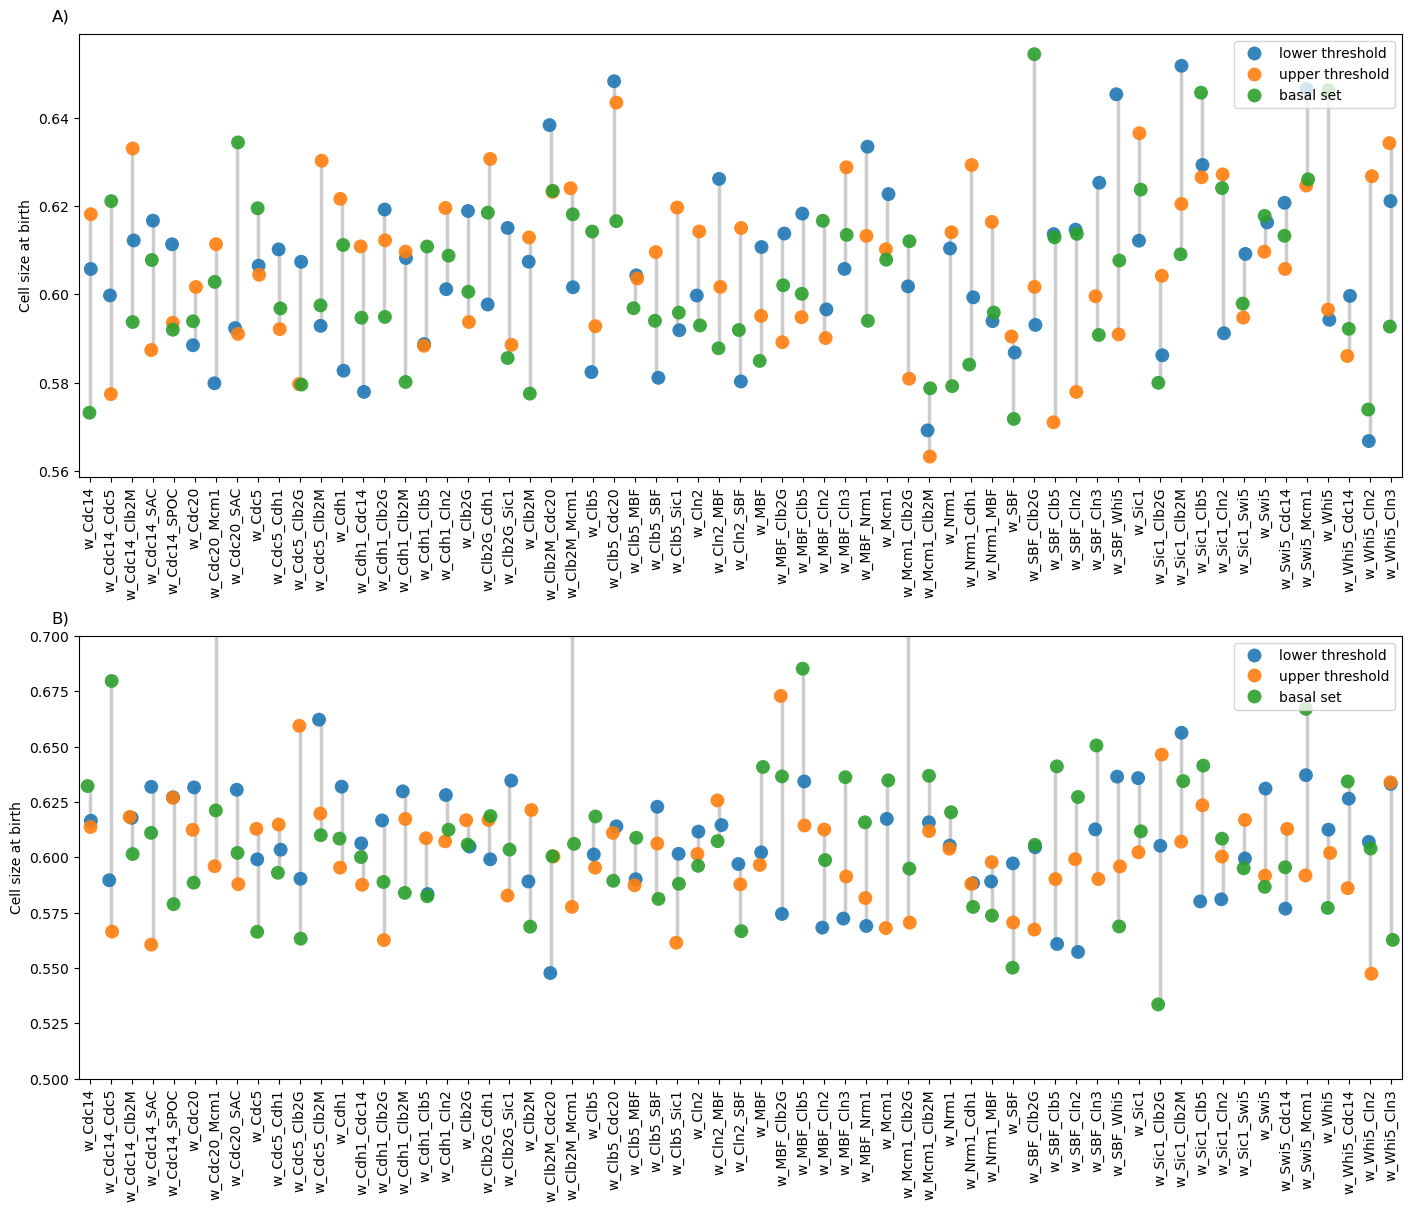

In [187]:
import matplotlib.transforms as mtransforms
fig = plt.figure(layout= 'constrained', figsize=(14,12))
axs = fig.subplot_mosaic([['A)'],['B)']])


sns.pointplot(data=four_t, x="param_index", y="cell_size_at_div",color="0.8", linestyle="none",
              errwidth=2.5, marker="",native_scale=True,log_scale=False,
              errorbar=('ci', 100),ax=axs["A)"])

sns.stripplot(data=four_t, x="param_index", y="cell_size_at_div",
              hue="cat",size=10,ax=axs["A)"],alpha=.9)

axs["A)"].set_xlabel("")
axs["A)"].set_ylabel("Cell size at birth")
axs["A)"].legend(loc="upper right")
axs["A)"].tick_params(axis='x', rotation=90)



import random

sns.pointplot(data=five_t, x="param_index", y="cell_size_at_div",color="0.8", linestyle="none",errwidth=2.5,
              marker="",native_scale=True,log_scale=False,errorbar=('ci', 100),ax=axs["B)"])
sns.stripplot(data=five_t, x="param_index", y="cell_size_at_div",hue="cat",size=10,ax=axs["B)"],alpha=.9)
axs["B)"].legend(loc="upper right")
axs["B)"].set_xlabel("")
axs["B)"].set_ylabel("Cell size at birth")
axs["B)"].set_ylim(0.50,0.7)
axs["B)"].tick_params(axis='x', rotation=90)

for label, ax in axs.items():
    # label physical distance to the left and up:
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='large', va='bottom')
#plt.savefig('../figures/SFig2.pdf',format="pdf", bbox_inches="tight")
plt.show()